## Banco de dados DATASET11 - Bearing Classification

### Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import iirnotch
import scipy.io

### Carregamento de arquivos

In [3]:

letters = ['H', 'I', 'O'] # 0-healthy, I-inner fault, O-outer fault
# letters = ['H']
speeds = ['A', 'B', 'C', 'D']
# speeds = ['A']
trials = ['1','2', '3']
# trials = ['1']
state = 0
dataset = []
for letter in letters:
    for speed in speeds:
        for trial in trials:
            path_signal = f'../../Dados/Rotor_Bearing/Dataset11/Data/{letter}-{speed}-{trial}.mat'
            df_signal = scipy.io.loadmat(path_signal)
            channel_1 = df_signal['Channel_1'].flatten()
            # channel_2 = df_signal['Channel_2'].flatten()
            signal = []
            signal.append([channel_1, state])
            dataset.append(signal)
    state +=1

In [4]:
data = []
X=[]
y=[]
for i in dataset:
    data.append(i[0])

for i in data:
    X.append(i[0])
    y.append(i[1])

##### Visualização dos sinais

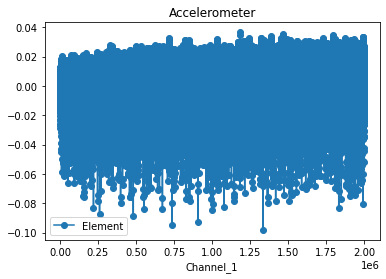

In [5]:
# Create a new figure for each element
plt.figure()

# Plot the data
plt.plot(dataset[0][0][0], marker='o', linestyle='-', label=f'Element')
plt.rcParams['agg.path.chunksize'] = 10000

# Customize plot (add title, labels, legend, etc. as needed)
plt.title(f'Accelerometer')
plt.xlabel('Channel_1')
plt.legend()

# Show or save the figure
# plt.show()  # Uncomment this line to display figures interactively
# plt.savefig(f'element_{idx + 1}_plot.png')  # Save figures to files

# Show the plots (if not saving to files)
# plt.savefig('teste.png')


### Tratamento dos dados em vetores de entrada

### Aplicação de técnicas de processamento de sinais - Cálculos estatísticos

--------------------------------------------------------

#### Time-Domain Features

##### Skewness

In [5]:
from scipy.stats import skew

def get_skewness(signal):
    return skew(signal)

##### Kurtosis

In [6]:
from scipy.stats import kurtosis

def get_kurtosis(signal):
    return kurtosis(signal)

##### Shape Factor

In [7]:
def get_shape_factor(signal):
    N = len(signal)
    return np.sqrt(((signal**2).sum()/N) / ((abs(signal)).sum()/N))

##### Variation

In [8]:
import statistics

def get_variance(signal):
    return statistics.variance(signal)

##### Standard Deviation

In [9]:
def get_std(signal):
    return statistics.stdev(signal)

##### RMS

In [10]:
def get_rms_acceleration(signal):
    N = len(signal)
    return np.sqrt(1/N * (signal**2).sum())

##### Peak-to-Peak

In [11]:
def get_peak_acceleration(signal):
    return max(abs(signal))

##### Crest Factor

In [12]:
def get_crest_factor(signal):
    return get_peak_acceleration(signal)/get_rms_acceleration(signal)

-----------------------------------------------------------------------------------

#### Frequency-Domain Features

In [13]:
def get_frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))
def get_mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))
def get_root_mean_square_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal))
def get_root_variance_frequency(signal):
    return  np.sqrt(get_mean_square_frequency(signal) - get_frequency_centre(signal)**2)

------------------------------------------------------------------------------------

#### Time-Frequency Domain

##### Estimate power spectral density using Welch’s method.


##### Power Spectral Density (PSD)

##### Função de Densidade de Probabilidade (PDF). - cálculo de skewness e kurtosis

---------------------------------------------------------------------------------------

In [14]:
features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration, 
                          get_peak_acceleration,
                          get_crest_factor, get_frequency_centre, get_mean_square_frequency, get_root_mean_square_frequency, 
                          get_root_variance_frequency]

list_features_function = features_function[0:2]

list_features_function

[<function __main__.get_skewness(signal)>,
 <function __main__.get_kurtosis(signal)>]

In [16]:
from itertools import combinations

features_function = [get_skewness, get_kurtosis, get_shape_factor, get_variance, get_std, get_rms_acceleration,
                     get_peak_acceleration, get_crest_factor, get_frequency_centre, get_mean_square_frequency,
                     get_root_mean_square_frequency, get_root_variance_frequency]

list_features_function = []

# Iterate over different sizes of combinations
for r in range(1, len(features_function) + 1):
    # Generate all combinations of size r
    combinations_r = combinations(features_function, r)
    
    # Extend the list with each combination
    list_features_function.extend(combinations_r)

# Convert combinations to lists for printing
list_features_function = [list(combination) for combination in list_features_function]

# Print all combinations
# Print all combinations with indices
for index, combination in enumerate(list_features_function):
    print(f"Index {index}: {combination}")
    for i in combination:
        print(type(i))

Index 0: [<function get_skewness at 0x0000028B89A62B80>]
<class 'function'>
Index 1: [<function get_kurtosis at 0x0000028B89A629D0>]
<class 'function'>
Index 2: [<function get_shape_factor at 0x0000028B89A628B0>]
<class 'function'>
Index 3: [<function get_variance at 0x0000028B89A62E50>]
<class 'function'>
Index 4: [<function get_std at 0x0000028B89A79C10>]
<class 'function'>
Index 5: [<function get_rms_acceleration at 0x0000028B89A79DC0>]
<class 'function'>
Index 6: [<function get_peak_acceleration at 0x0000028B89A79CA0>]
<class 'function'>
Index 7: [<function get_crest_factor at 0x0000028B89A79F70>]
<class 'function'>
Index 8: [<function get_frequency_centre at 0x0000028B89A56CA0>]
<class 'function'>
Index 9: [<function get_mean_square_frequency at 0x0000028B89A79E50>]
<class 'function'>
Index 10: [<function get_root_mean_square_frequency at 0x0000028B89A79EE0>]
<class 'function'>
Index 11: [<function get_root_variance_frequency at 0x0000028B89A81040>]
<class 'function'>
Index 12: [<

In [15]:
experiments_ids = list(range(0,len(dataset)))

In [22]:
dataset[35][0][1]

2

In [16]:
data_features = []
i = 0
for exp in experiments_ids:
    experiment = dataset[exp][0][0]
    feature_accelerometer = []

    for func in list_features_function:
        
        accelerometer = func(dataset[exp][0][0])

        if type(accelerometer) == list:
            feature_accelerometer+=accelerometer
            
        else:
            feature_accelerometer.append(accelerometer)

    
    data_features.append([feature_accelerometer, [dataset[exp][0][1]]])

In [25]:
len(data_features)

36

In [17]:
features_list = list()

for i in data_features:
    y = np.concatenate([np.array(x) for x in i])
    features_list.append(y)

features_list = np.array(features_list)
len(features_list[:, 1])

36

### Aplicação de técnicas de inteligência artificial

In [27]:
features_list

array([[-0.32475027,  2.38600824,  0.        ],
       [-0.22270423,  1.97591857,  0.        ],
       [-0.24821756,  1.90705644,  0.        ],
       [-0.21434363,  1.81587095,  0.        ],
       [-0.35089627,  3.11674075,  0.        ],
       [-0.1675782 ,  1.76874976,  0.        ],
       [-0.24321569,  1.85683692,  0.        ],
       [-0.29164404,  2.16175847,  0.        ],
       [-0.26069383,  1.96637944,  0.        ],
       [-0.34223142,  2.57709578,  0.        ],
       [-0.35048064,  2.68920142,  0.        ],
       [-0.03419698,  1.54215821,  0.        ],
       [-0.81296965, 11.67626118,  1.        ],
       [-0.18811017, 20.26228654,  1.        ],
       [-0.05763012, 16.90026217,  1.        ],
       [-0.14315521, 24.94852721,  1.        ],
       [-0.12711404, 20.45604066,  1.        ],
       [-0.1111008 , 23.68181163,  1.        ],
       [-0.08968942, 18.63451227,  1.        ],
       [-0.08091848, 18.14555648,  1.        ],
       [-0.03867784, 14.73136144,  1.   

In [28]:
## Kohonen Map (clusterizacao) - 1º - unsupervised
from sklearn_som.som import SOM

index = 1

dim_ = 2*1+1

iris_som = SOM(n=1,m=3,dim=dim_, max_iter=100000) 
iris_som.fit(features_list)
predictions = iris_som.predict(features_list)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Check if values match for each index
matches = [label == pred for label, pred in zip(labels, predictions)]
# accuracy = np.mean(np.array(matches))*100

# print(f'Acc: {accuracy:.2f}%')

[True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


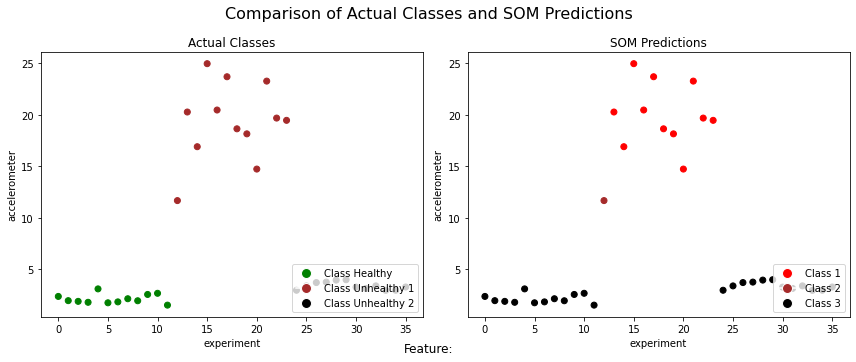

In [132]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Assuming you have the necessary data and features_list defined

# Create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

index1 = 1

# Extract features
x = list(range(0,36))
y = features_list[:, index1]
label = features_list[:, -1]

# Plot the first subplot (Actual Classes)
scatter1 = axs[0].scatter(x, y, c=label, cmap=ListedColormap(['green', 'brown', 'black']))
axs[0].set_title('Actual Classes')
axs[0].set_xlabel(f'experiment')  # Add X axis label
axs[0].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['Healthy', 'Unhealthy 1', 'Unhealthy 2']

# Create a custom legend
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['green', 'brown', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the first subplot
axs[0].legend(handles=legend_elements1, loc='lower right')

# Plot the second subplot (SOM Predictions)
scatter2 = axs[1].scatter(x, y, c=predictions, cmap=ListedColormap(['red', 'brown', 'black']))
axs[1].set_title('SOM Predictions')
axs[1].set_xlabel(f'experiment')  # Add X axis label
axs[1].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['1', '2', '3']

# Create a custom legend
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['red', 'brown', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the second subplot
axs[1].legend(handles=legend_elements2, loc='lower right')

# Set a global title for the entire figure
fig.suptitle(f'Comparison of Actual Classes and SOM Predictions', fontsize=16)

# Add a subtitle below the subplots
fig.text(0.5, 0.02, f'Feature:', ha='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
# plt.savefig(f'image_{functions}.png')

# Show the plots
plt.show()


Testing Results:
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.80      0.89         5
         2.0       1.00      1.00      1.00         5

    accuracy                           0.92        13
   macro avg       0.92      0.93      0.92        13
weighted avg       0.94      0.92      0.92        13



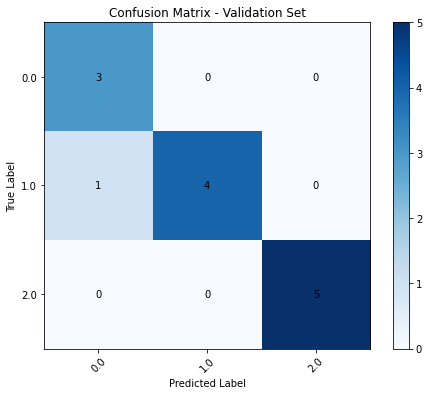

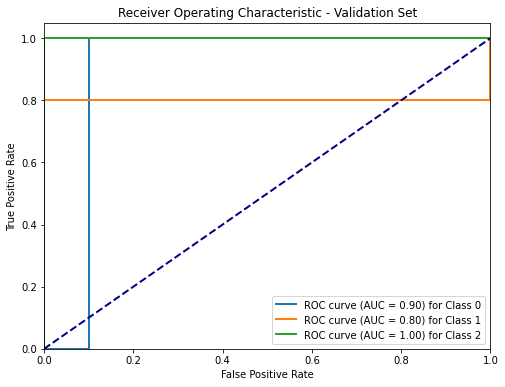

In [25]:
## MLP (classificacao) - supervised
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

X = features_list[:,0:4]
y = features_list[:,-1]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,30,30,10), max_iter=1000, random_state=42)

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the validation data
# y_val_pred = mlp_classifier.predict(X_val)

# Evaluate the model on the validation set
# val_accuracy = accuracy_score(y_val, y_val_pred)
# val_classification_rep = classification_report(y_val, y_val_pred)

# # Print the validation results
# print("Validation Results:")
# print(f"Accuracy: {val_accuracy}")
# print("Classification Report:\n", val_classification_rep)

# Make predictions on the testing data
y_test_pred = mlp_classifier.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the testing results
print("\nTesting Results:")
print(f"Accuracy: {test_accuracy}")
print("Classification Report:\n", test_classification_rep)

# Plot Confusion Matrix for Validation Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Set')
plt.colorbar()

classes = list(set(y))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix_test[i, j]), ha='center', va='center')

plt.show()

# Convert labels to binary format for the ROC curve
y_val_bin = label_binarize(y_test, classes=np.unique(y))

# Create a OneVsRestClassifier for ROC curve
classifier_ovr = OneVsRestClassifier(mlp_classifier)
y_val_score = classifier_ovr.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Validation Set')
plt.legend(loc="lower right")

plt.show()


Validation Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[ 4.68325011e-01 -6.17374956e-01]
 [-9.93128192e-02  1.47910205e+00]
 [ 7.89608517e-01 -5.64042649e-01]
 [-5.89083389e-04 -6.18695451e-01]
 [ 3.24114967e-01  1.50304662e+00]
 [ 7.08680529e-01 -6.34349680e-01]
 [ 8.94401929e-01  1.84943044e+00]
 [-4.43701227e+00  4.18021917e-01]
 [-6.03179864e-01 -7.81946890e-01]
 [ 4.35276992e-01  1.90169458e+00]
 [-1.16920404e+00 -7.06473205e-01]]
[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
[2. 1. 2. 2. 1. 2. 1. 0. 0. 1. 0.]

Validation Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score  

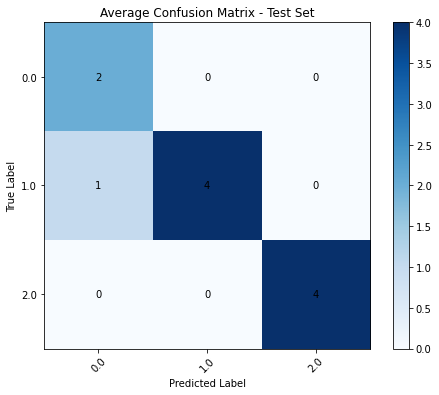

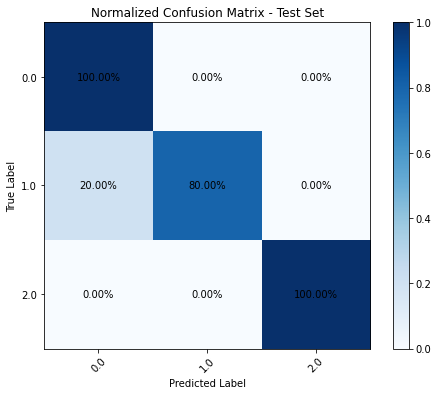

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier

X = features_list[:, 0:2]
y = features_list[:, -1]

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 30, 30, 10), max_iter=100000, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation results
test_accuracies = []
test_classification_reps = []
conf_matrices = []
roc_aucs = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Fit the classifier to the training data
    mlp_classifier.fit(X_train_fold, y_train_fold)

    # Make predictions on the testing data
    y_val_pred_fold = mlp_classifier.predict(X_val_fold)

    # Evaluate the model on the validation set
    val_accuracy_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    val_classification_rep_fold = classification_report(y_val_fold, y_val_pred_fold)

    print("\nValidation Results:")
    print(f"Accuracy: {val_accuracy_fold}")
    print("Classification Report:\n", val_classification_rep_fold)

    # Make predictions on the testing data
    y_test_pred_fold = mlp_classifier.predict(X_test)

    print(X_test)
    print(y_test)
    print(y_test_pred_fold)

    # Evaluate the model on the testing set
    test_accuracy_fold = accuracy_score(y_test, y_test_pred_fold)
    test_classification_rep_fold = classification_report(y_test, y_test_pred_fold)
    test_accuracies.append(test_accuracy_fold)
    test_classification_reps.append(test_classification_rep_fold)

    # Plot Confusion Matrix for Validation Set
    conf_matrix_test_fold = confusion_matrix(y_test, y_test_pred_fold)
    conf_matrices.append(conf_matrix_test_fold)

    # Convert labels to binary format for the ROC curve
    y_test_bin_fold = label_binarize(y_test, classes=np.unique(y))

    # Create a OneVsRestClassifier for ROC curve
    classifier_ovr_fold = OneVsRestClassifier(mlp_classifier)
    y_test_score_fold = classifier_ovr_fold.fit(X_train_fold, y_train_fold).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr_fold = dict()
    tpr_fold = dict()
    roc_auc_fold = dict()

    for i in range(len(np.unique(y))):
        fpr_fold[i], tpr_fold[i], _ = roc_curve(y_test_bin_fold[:, i], y_test_score_fold[:, i])
        roc_auc_fold[i] = auc(fpr_fold[i], tpr_fold[i])

    roc_aucs.append(roc_auc_fold)

# # Print the average test results over all folds
# print("\nAverage Test Results Across Folds:")
# print(f"Accuracy: {np.mean(test_accuracies)}")
# print("Average Classification Report:\n", np.mean(test_classification_reps, axis=0))

# Plot average Confusion Matrix across all folds
conf_matrix_avg = np.mean(conf_matrices, axis=0)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_avg, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix - Test Set')
plt.colorbar()

classes = list(set(y))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix_avg[i, j])), ha='center', va='center')

plt.show()

# # Plot average ROC curve across all folds
# roc_aucs_avg = np.mean(roc_aucs, axis=0)
# plt.figure(figsize=(8, 6))
# for i in range(len(np.unique(y))):
#     plt.plot(fpr[i], tpr[i], lw=2, label=f'Average ROC curve (AUC = {roc_aucs_avg[i]:.2f}) for Class {i}')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Average Receiver Operating Characteristic - Test Set')
# plt.legend(loc="lower right")

# plt.show()

# Plot normalized Confusion Matrix for Validation Set
conf_matrix_test_normalized = conf_matrix_avg / conf_matrix_avg.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test_normalized, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Normalized Confusion Matrix - Test Set')
plt.colorbar()

classes = list(set(y))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix_test_normalized[i, j]*100:.2f}%", ha='center', va='center')

plt.show()


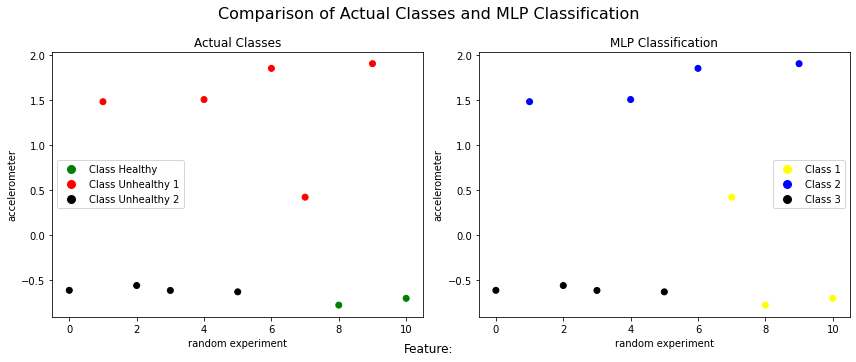

In [59]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

index1 = 1

# Extract features
x = list(range(0,11))
y = X_test[:, index1]
label = features_list[:, -1]

# Plot the first subplot (Actual Classes)
scatter1 = axs[0].scatter(x, y, c=y_test, cmap=ListedColormap(['green', 'red', 'black']))
axs[0].set_title('Actual Classes')
axs[0].set_xlabel(f'random experiment')  # Add X axis label
axs[0].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['Healthy', 'Unhealthy 1', 'Unhealthy 2']

# Create a custom legend
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['green', 'red', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the first subplot
axs[0].legend(handles=legend_elements1, loc='best')

# Plot the second subplot (SOM Predictions)
scatter2 = axs[1].scatter(x, y, c=y_test_pred_fold, cmap=ListedColormap(['yellow', 'blue', 'black']))
axs[1].set_title('MLP Classification')
axs[1].set_xlabel(f'random experiment')  # Add X axis label
axs[1].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['1', '2', '3']

# Create a custom legend
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['yellow', 'blue', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the second subplot
axs[1].legend(handles=legend_elements2, loc='best')

# Set a global title for the entire figure
fig.suptitle(f'Comparison of Actual Classes and MLP Classification', fontsize=16)

# Add a subtitle below the subplots
fig.text(0.5, 0.02, f'Feature:', ha='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
# plt.savefig(f'image_{functions}.png')

# Show the plots
plt.show()

In [64]:
## SVM (classificacao) - supervised
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 87.50%


[[ 4.68325011e-01 -6.17374956e-01]
 [-9.93128192e-02  1.47910205e+00]
 [ 7.89608517e-01 -5.64042649e-01]
 [-5.89083389e-04 -6.18695451e-01]
 [ 3.24114967e-01  1.50304662e+00]
 [ 7.08680529e-01 -6.34349680e-01]
 [ 8.94401929e-01  1.84943044e+00]
 [-4.43701227e+00  4.18021917e-01]
 [-6.03179864e-01 -7.81946890e-01]
 [ 4.35276992e-01  1.90169458e+00]
 [-1.16920404e+00 -7.06473205e-01]]
[2. 1. 2. 2. 1. 2. 1. 1. 0. 1. 0.]
[2. 1. 2. 2. 1. 2. 1. 0. 0. 1. 0.]
Accuracy on the test set: 90.91%
Cross-Validation Accuracy Scores: [1.  0.8 0.6 1.  1. ]
Average Cross-Validation Accuracy: 88.00%


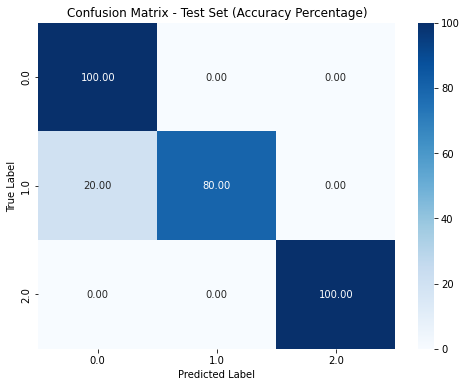

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM model
svm_model = SVC(kernel='linear', max_iter=10000)

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Train the model on the entire training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

print(X_test)
print(y_test)
print(y_pred)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Plot the confusion matrix with accuracy percentages and colorbar
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Test Set (Accuracy Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




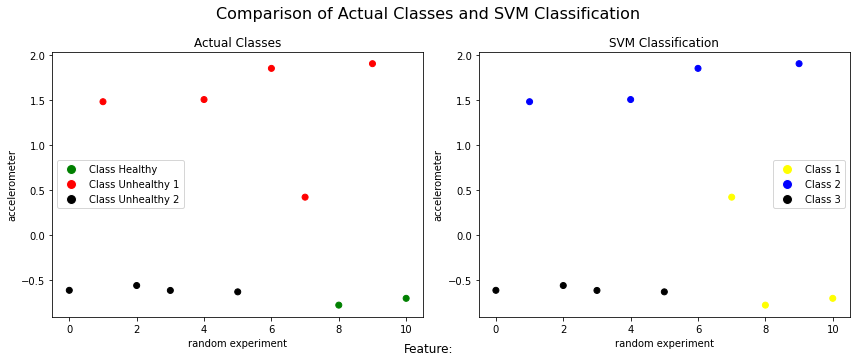

In [72]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# Create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

index1 = 1

# Extract features
x = list(range(0,11))
y = X_test[:, index1]
label = features_list[:, -1]

# Plot the first subplot (Actual Classes)
scatter1 = axs[0].scatter(x, y, c=y_test, cmap=ListedColormap(['green', 'red', 'black']))
axs[0].set_title('Actual Classes')
axs[0].set_xlabel(f'random experiment')  # Add X axis label
axs[0].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['Healthy', 'Unhealthy 1', 'Unhealthy 2']

# Create a custom legend
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['green', 'red', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the first subplot
axs[0].legend(handles=legend_elements1, loc='best')

# Plot the second subplot (SOM Predictions)
scatter2 = axs[1].scatter(x, y, c=y_pred, cmap=ListedColormap(['yellow', 'blue', 'black']))
axs[1].set_title('SVM Classification')
axs[1].set_xlabel(f'random experiment')  # Add X axis label
axs[1].set_ylabel(f'accelerometer')  # Add Y axis label
classes = ['1', '2', '3']

# Create a custom legend
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Class {classes[i]}',
                            markerfacecolor=['yellow', 'blue', 'black'][i], markersize=10) for i in range(3)]

# Add legend to the second subplot
axs[1].legend(handles=legend_elements2, loc='best')

# Set a global title for the entire figure
fig.suptitle(f'Comparison of Actual Classes and SVM Classification', fontsize=16)

# Add a subtitle below the subplots
fig.text(0.5, 0.02, f'Feature:', ha='center', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure
# plt.savefig(f'image_{functions}.png')

# Show the plots
plt.show()